<a href="https://colab.research.google.com/github/polliz9/atv1-dataframes/blob/main/programa_quest8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

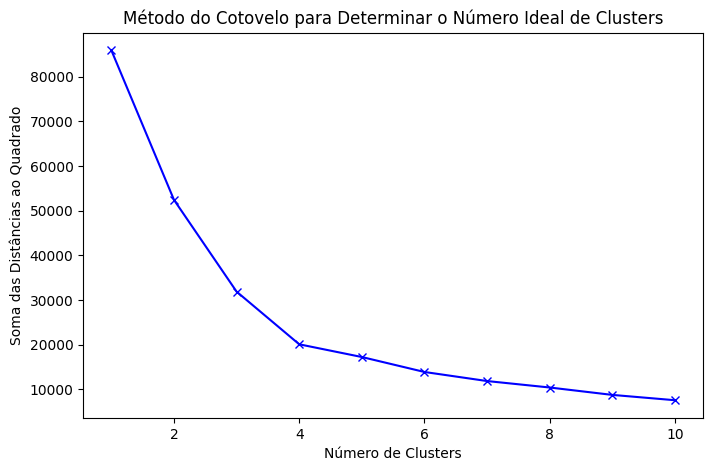

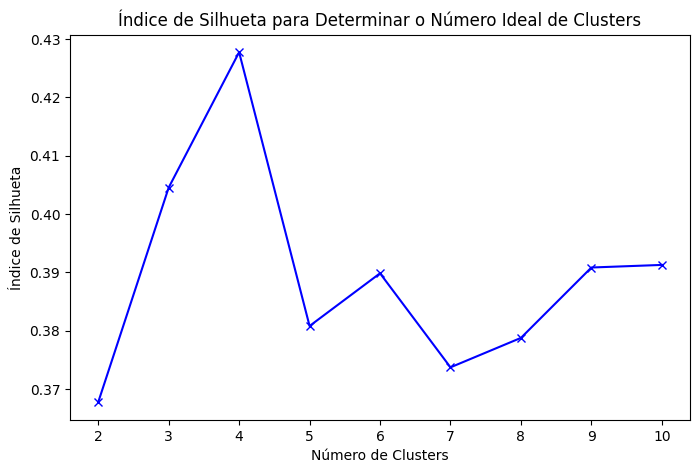

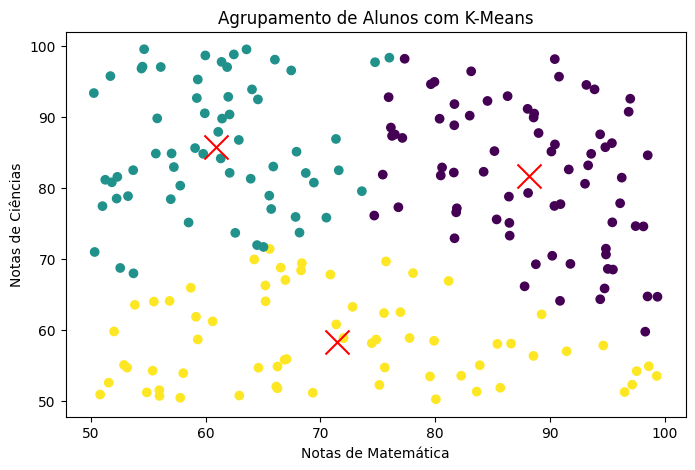

In [1]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Gerando dados fictícios
np.random.seed(42)
num_students = 200

# Notas de matemática e ciências (de 0 a 100)
math_scores = np.random.uniform(50, 100, num_students)
science_scores = np.random.uniform(50, 100, num_students)

# Criando um DataFrame
data = pd.DataFrame({'Math': math_scores, 'Science': science_scores})

# Determinando o número ideal de clusters usando a metodologia do "cotovelo"
sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias ao Quadrado')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.show()

# Determinando o número ideal de clusters com o índice de silhueta
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando o índice de silhueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.title('Índice de Silhueta para Determinar o Número Ideal de Clusters')
plt.show()

# Treinando o modelo K-Means com o número ideal de clusters (vamos assumir 3 clusters aqui)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)

# Visualizando os clusters em um gráfico de dispersão
plt.figure(figsize=(8, 5))
plt.scatter(data['Math'], data['Science'], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Notas de Matemática')
plt.ylabel('Notas de Ciências')
plt.title('Agrupamento de Alunos com K-Means')
plt.show()
